In [ ]:
#debug pandas not importing
import sys
print(sys.executable)
#taking the information from the line above -- directly import pandas module in here -- this is some wizardry
! /Users/Amy/anaconda3/python.exe -m pip install pandas

Step 1 - import data into juypter notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2 - Use matplotlib to make a barplot of the data and check for outliers

In [4]:
#import the data
df = pd.read_csv("DESEQ2NormalizedData.csv", index_col=0)
df.head()

,1,100,1000,10000,100009676,10001,10003,100037417,10004,100049716,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
GSM3577568,8.103918,7.937909,10.257489,11.186453,5.995394,7.667819,9.199965,10.280796,6.549983,6.243322,...,11.221806,10.175303,10.056090,5.454826,9.981236,8.396273,5.518956,11.268024,6.487247,9.417459
GSM3577569,7.009610,7.902695,10.120491,10.939458,6.258109,7.682248,7.454174,8.647815,6.885065,6.598184,...,12.246937,11.343959,10.626753,7.470028,10.016374,8.426003,3.276256,11.831612,8.417852,8.438144
GSM3577570,7.046131,7.680613,10.303429,11.387845,6.331885,7.715589,8.728490,8.635666,6.113245,6.541339,...,12.492072,11.431233,10.663922,8.280252,10.833722,8.928075,2.653813,11.588094,9.232752,8.337510
GSM3577571,7.486468,7.611999,10.277881,11.121012,5.280793,7.842296,8.047696,9.168947,6.455880,6.257334,...,11.654149,10.630377,10.269111,5.818450,9.913436,8.332221,4.326597,11.708139,7.896452,9.286598
GSM3577572,7.553102,8.112529,10.274801,11.085076,6.112529,7.578193,7.974453,8.771874,6.264532,7.089446,...,11.903434,10.865720,10.183736,5.993230,10.011766,8.448132,4.383177,11.705105,8.359251,9.140874


In [5]:
#returns the "dimensions" of the data
df.shape

(289, 16232)

In [6]:
#swaps the x and y values
data = df.transpose()
data.shape

(16232, 289)

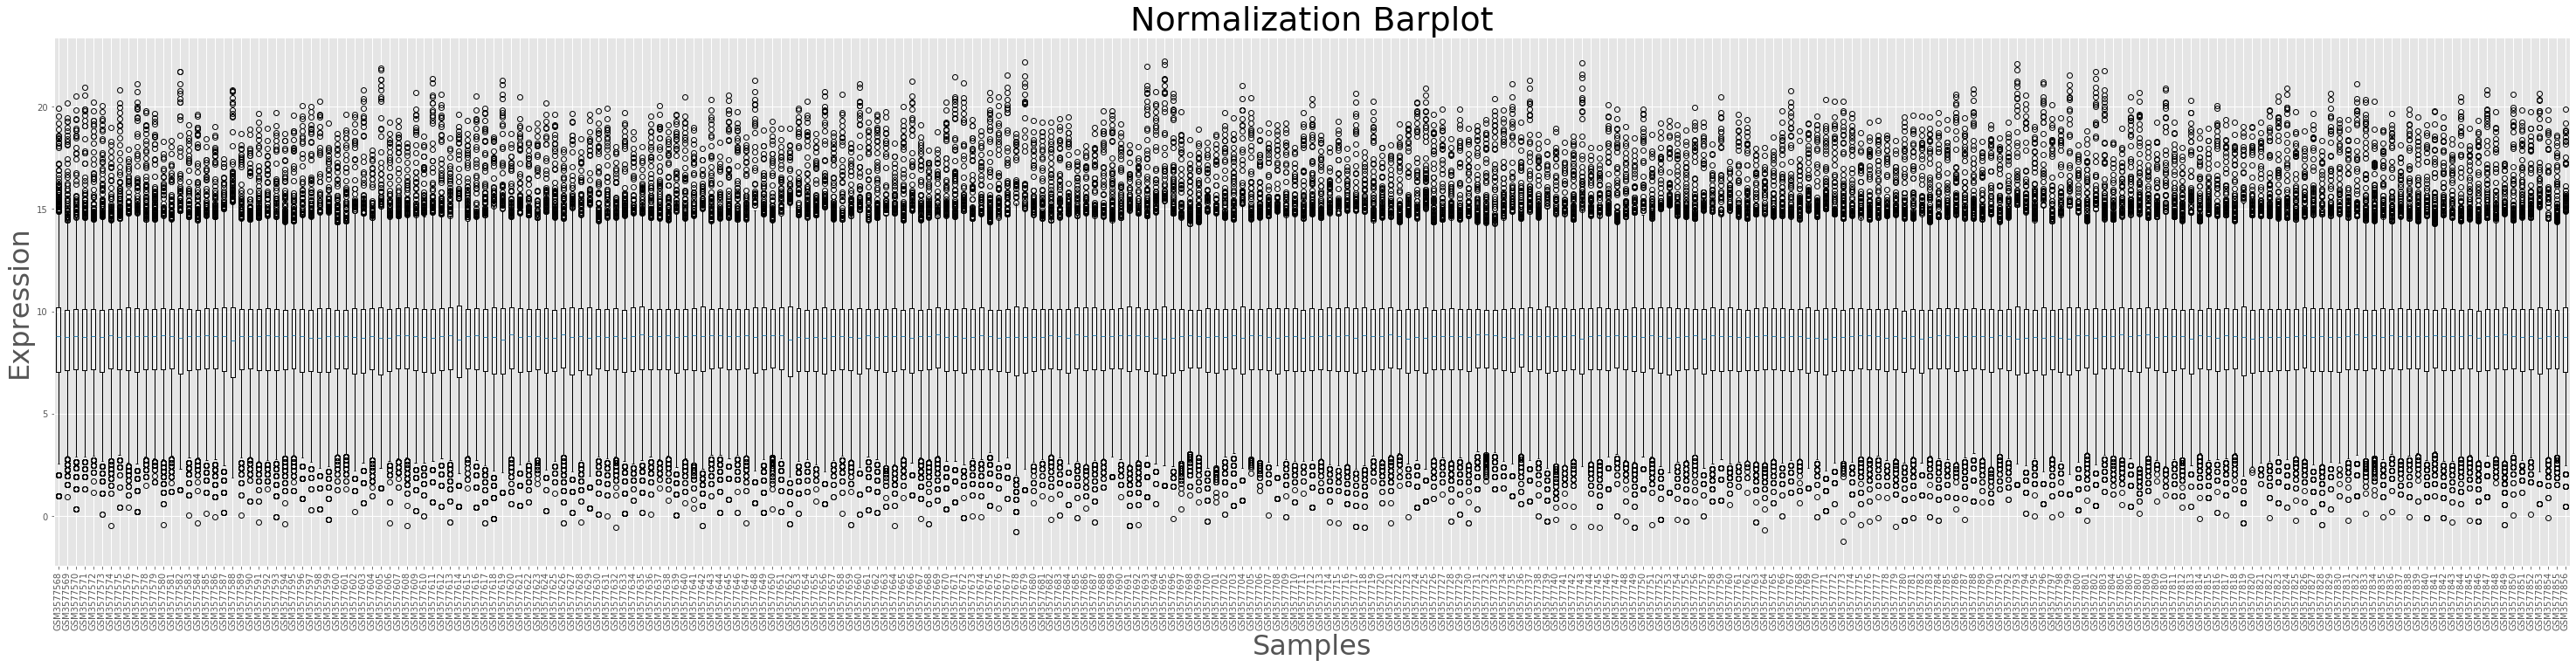

In [13]:
#print(plt.style.available) list of available displays

plt.style.use('fast')
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

fig.set_size_inches(50, 10.5)

plt.boxplot(data)
plt.xticks(rotation = 90)

plt.xlabel("Samples", size = 32)
plt.ylabel("Expression", size = 32)
plt.title("Normalization Barplot", size = 38)

x_ticks = list(df.index)
ax.set_xticklabels(x_ticks)

plt.show()

Step 3 - remove outliers; none exist
Step 4 - find library to convert gene ids into gene symbols - perhaps an R package or online resource?